In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras.backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [ ]:
import numpy as np
from keras_vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils
import keras
import unittest
# extract feature 


In [ ]:
model = VGGFace(include_top=False,model='resnet50')


In [ ]:
model.summary()


net = Model(model.input,model.layers[-2].output)

In [32]:
net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, None, None, 6 9408        input_20[0][0]                   
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, None, None, 6 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_589 (Activation)     (None, None, None, 6 0           conv1/7x7_s2/bn[0][0]            
__________________________________________________________________________________________________
max_poolin

In [12]:

model = VGGFace(include_top=False,model='resnet50')
img = image.load_img('face.jpg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = utils.preprocess_input(x,version=2)

import numpy as np
from keras_vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils
from keras.layers import Flatten, Dense, Input, GlobalAveragePooling2D, \
    GlobalMaxPooling2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, \
    AveragePooling2D, Reshape, Permute, multiply
model = VGGFace(include_top=False,model='resnet50')
input_1 = Input(shape=(224, 224, 3))
for x in model.layers[:-3]:
    x.trainable = True
fm = model(input_1)
print(fm.shape)


(?, 1, 1, 2048)


In [33]:
from keras.models import Model

model = VGGFace(include_top=False, model='resnet50')
model = Model(model.input,model.layers[-2].output)
input = Input(shape=(224, 224, 3))
for x in model.layers[:-2]:
    x.trainable = True
output = model(input)
net = Model(input, output)
net.summary()


Exception ignored in: <function BaseSession._Callable.__del__ at 0x1386dd8c8>
Traceback (most recent call last):
  File "/Users/tezign/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/Users/tezign/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 140466515654192


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
model_9 (Model)              multiple                  23561152  
Total params: 23,561,152
Trainable params: 23,508,032
Non-trainable params: 53,120
_________________________________________________________________


In [34]:

img = image.load_img('face.jpg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = utils.preprocess_input(x,version=2)
res = net.predict(x)
res.shape

(1, 7, 7, 2048)

In [26]:
net.layers


Exception ignored in: <function BaseSession._Callable.__del__ at 0x1386dd8c8>
Traceback (most recent call last):
  File "/Users/tezign/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/Users/tezign/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 140466515654192


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
model_9 (Model)              multiple                  23561152  
Total params: 23,561,152
Trainable params: 23,508,032
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
img = image.load_img('face.jpg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = utils.preprocess_input(x,version=2)
res = net.predict(x)
res.shape

InvalidArgumentError: input_17:0 is both fed and fetched.

(1, 1, 1, 2048)

### siamese network for https://www.kaggle.com/c/recognizing-faces-in-the-wild

In [27]:

from collections import defaultdict
from glob import glob
from random import choice, sample

import cv2
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract
from keras.models import Model
from keras.optimizers import Adam
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace

In [28]:
train_file_path = "Faces_in_the_Wild/train_relationships.csv"
train_folders_path = "Faces_in_the_Wild/train/"
val_famillies = "F09"

all_images = glob(train_folders_path + "*/*/*.jpg")

train_images = [x for x in all_images if val_famillies not in x]
val_images = [x for x in all_images if val_famillies in x]

In [31]:
len(val_images)

1147

In [32]:

train_person_to_images_map = defaultdict(list)

ppl = [x.split("/")[-3] + "/" + x.split("/")[-2] for x in all_images]

In [36]:
for x in train_images:
    train_person_to_images_map[x.split("/")[-3] + "/" + x.split("/")[-2]].append(x)

In [37]:
val_person_to_images_map = defaultdict(list)

for x in val_images:
    val_person_to_images_map[x.split("/")[-3] + "/" + x.split("/")[-2]].append(x)

In [38]:
relationships = pd.read_csv(train_file_path)
relationships = list(zip(relationships.p1.values, relationships.p2.values))
relationships = [x for x in relationships if x[0] in ppl and x[1] in ppl]

In [39]:
train = [x for x in relationships if val_famillies not in x[0]]
val = [x for x in relationships if val_famillies in x[0]]

In [43]:
def read_img(path):
    img = cv2.imread(path)
    img = np.array(img).astype(np.float)
    return preprocess_input(img, version=2)

In [44]:
def gen(list_tuples, person_to_images_map, batch_size=16):
    ppl = list(person_to_images_map.keys())
    while True:
        batch_tuples = sample(list_tuples, batch_size // 2)
        labels = [1] * len(batch_tuples)
        while len(batch_tuples) < batch_size:
            p1 = choice(ppl)
            p2 = choice(ppl)

            if p1 != p2 and (p1, p2) not in list_tuples and (p2, p1) not in list_tuples:
                batch_tuples.append((p1, p2))
                labels.append(0)

        for x in batch_tuples:
            if not len(person_to_images_map[x[0]]):
                print(x[0])

        X1 = [choice(person_to_images_map[x[0]]) for x in batch_tuples]
        X1 = np.array([read_img(x) for x in X1])

        X2 = [choice(person_to_images_map[x[1]]) for x in batch_tuples]
        X2 = np.array([read_img(x) for x in X2])

        yield [X1, X2], labels

In [45]:
def baseline_model():
    input_1 = Input(shape=(224, 224, 3))
    input_2 = Input(shape=(224, 224, 3))

    base_model = VGGFace(model='resnet50', include_top=False)

    for x in base_model.layers[:-3]:
        x.trainable = True

    x1 = base_model(input_1)
    x2 = base_model(input_2)

    # x1_ = Reshape(target_shape=(7*7, 2048))(x1)
    # x2_ = Reshape(target_shape=(7*7, 2048))(x2)
    #
    # x_dot = Dot(axes=[2, 2], normalize=True)([x1_, x2_])
    # x_dot = Flatten()(x_dot)

    x1 = Concatenate(axis=-1)([GlobalMaxPool2D()(x1), GlobalAvgPool2D()(x1)])
    x2 = Concatenate(axis=-1)([GlobalMaxPool2D()(x2), GlobalAvgPool2D()(x2)])

    x3 = Subtract()([x1, x2])
    x3 = Multiply()([x3, x3])

    x = Multiply()([x1, x2])

    x = Concatenate(axis=-1)([x, x3])

    x = Dense(100, activation="relu")(x)
    x = Dropout(0.01)(x)
    out = Dense(1, activation="sigmoid")(x)

    model = Model([input_1, input_2], out)

    model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=Adam(0.00001))

    model.summary()

    return model

In [1]:
import matplotlib.pyplot as plt

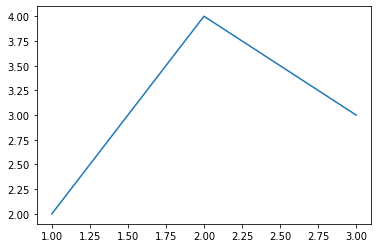

In [2]:
plt.plot([1,2,3],[2,4,3])

In [3]:
import joblib

In [4]:
epoch_info = joblib.load('epoch_info1560485905.540373.pkl')

In [5]:
loss_list = [ [x,epoch_info[x]['loss'],epoch_info[x]['acc']] for x in epoch_info]

In [6]:
len(loss_list)

100

In [7]:
loss_list

[[0, 0.7021258804533217, 0.5361813426329556],
 [1, 0.6996901631355286, 0.5126416739319966],
 [2, 0.7030642264419131, 0.5213600697471665],
 [3, 0.6875947945647769, 0.5265911072362686],
 [4, 0.6862330701616075, 0.5283347863993025],
 [5, 0.6890767183568742, 0.5300784655623365],
 [6, 0.6913757257991366, 0.5231037489102005],
 [7, 0.676337844795651, 0.5640802092414996],
 [8, 0.6820654306146834, 0.5658238884045336],
 [9, 0.6832280887497796, 0.5396687009590235],
 [10, 0.6710062987274594, 0.5867480383609416],
 [11, 0.6734182437260946, 0.5884917175239756],
 [12, 0.6722735895050896, 0.5719267654751525],
 [13, 0.6699738105138143, 0.5780296425457716],
 [14, 0.6657597389486101, 0.5823888404533566],
 [15, 0.662916835811403, 0.5937227550130776],
 [16, 0.6744895444975959, 0.5510026155187445],
 [17, 0.6560041738881005, 0.5867480383609416],
 [18, 0.6615105039543576, 0.5945945945945946],
 [19, 0.6571931342283884, 0.5815170008718396],
 [20, 0.6528457999229431, 0.6015693112467306],
 [21, 0.6493542989095052,

In [9]:
import numpy as np
loss_list = np.array(loss_list)

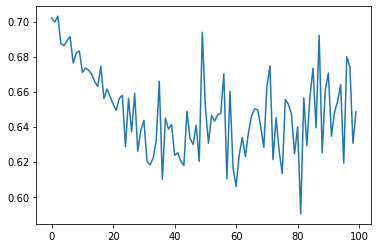

In [10]:
plt.plot(loss_list[:, 0], loss_list[:, 1])


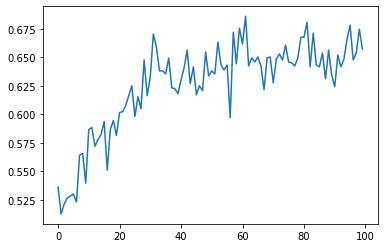

In [11]:
plt.plot(loss_list[:, 0], loss_list[:, 2])

In [21]:
import torch
import torchvision
import torchvision.utils as vutils
import numpy as np
import torchvision.models as models
from torchvision import datasets
from tensorboardX import SummaryWriter